In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

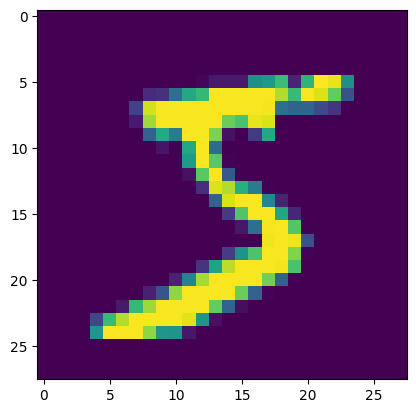

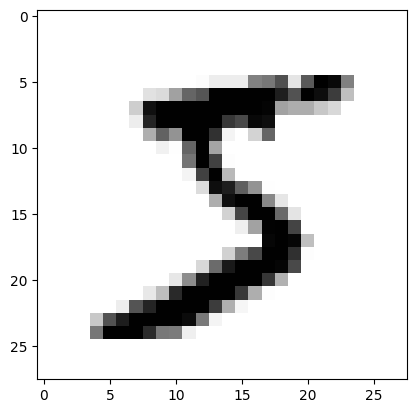

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap = plt.cm.binary)

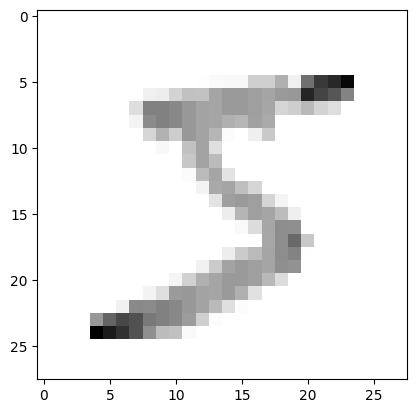

In [12]:
# Normalizing

X_train = keras.utils.normalize (X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)

plt.imshow(X_train[0], cmap = plt.cm.binary)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# Resizing Image to make it easier for Convolution

In [15]:
import numpy as np
IMG_SIZE = 28
# Increasing one dimension for kernel operation
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples Dimension", X_trainr.shape)
print("Testing Samples Dimension", X_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [16]:
# Creating NN

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [22]:
model = Sequential()

# Making 3 Convolution Layers

model.add(Conv2D(64,(3,3), input_shape = X_trainr.shape[1:])) #input_shape is only required for first input layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


# Softmax for multi class
# Sigmoid for binary classification

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_10 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_11 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                

In [25]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [26]:
model.fit(X_trainr, y_train, epochs= 30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 64s 47ms/step - loss: 0.3473 - accuracy: 0.8887 - val_loss: 0.1096 - val_accuracy: 0.9652
Epoch 2/30
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0991 - accuracy: 0.9699 - val_loss: 0.0814 - val_accuracy: 0.9749
Epoch 3/30
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.0737 - val_accuracy: 0.9778
Epoch 4/30
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0736 - val_accuracy: 0.9791
Epoch 5/30
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0640 - val_accuracy: 0.9803
Epoch 6/30
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.0549 - val_accuracy: 0.9839
Epoch 7/30
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0601 -

In [27]:
test_loss, test_acc = model.evaluate(X_testr, y_test)

print("Test Loss: ", test_loss)
print("Val acc: ", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0878 - accuracy: 0.9865
Test Loss:  0.08784426003694534
Val acc:  0.9865000247955322


In [28]:
predictions = model.predict([X_testr])

313/313 [==============================] - 5s 14ms/step


In [29]:
y_pred = predictions.argmax(axis = 1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9865

In [31]:
import cv2 as cv

In [39]:
img = cv.imread('seven.png')

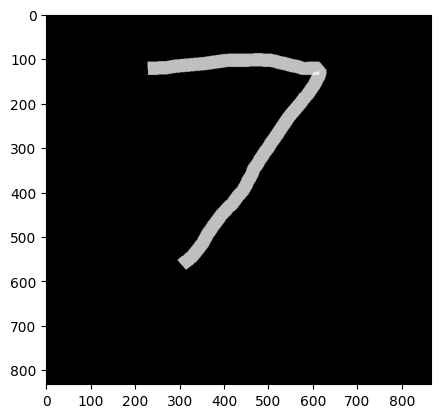

In [40]:
plt.imshow(img)

In [41]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
resized = cv.resize(gray, (28,28), interpolation = cv.INTER_AREA)

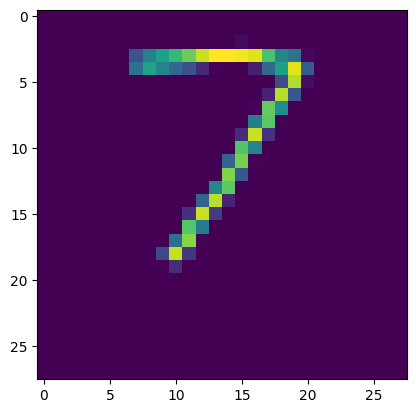

In [42]:
plt.imshow(resized)

In [43]:
newimg = keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [44]:
prediction = model.predict(newimg)

1/1 [==============================] - 0s 26ms/step


In [45]:
print(np.argmax(prediction))

7
